In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
%matplotlib inline
#from IPython.display import Image, SVG
import matplotlib.pyplot as plt
# importing os module
import os
import numpy as np
from PIL import Image, ImageOps
from numpy import asarray
import pandas as pd
# Dependencies to Visualise the model


In [3]:
emotions =['anger', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness','surprise']
faces = ['human_face', 'others']
folder = "test_image/"
size = 48

In [4]:
face_model = load_model('trained_models/face_model.h5')

In [5]:
# Load the model
emotion_model = load_model("trained_models/emotion_model.h5")

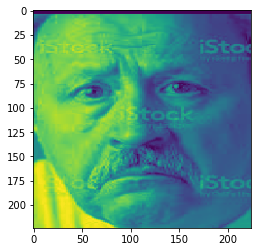

1/1 [==============================] - 0s 67ms/step
anger.png is human_face with anger

      anger   disgust      fear  happiness  neutrality  sadness  surprise
0  0.740447  0.004229  0.049187   0.003142    0.078473  0.12382  0.000702
xxxx-----------xxxx------------xxxx-----------xxxx---------



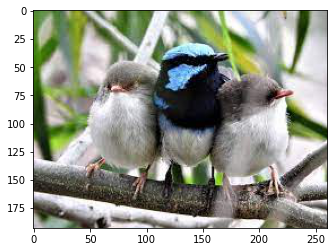

1/1 [==============================] - 0s 131ms/step
birds.jpg is others


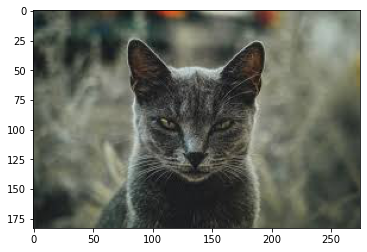

1/1 [==============================] - 0s 183ms/step
cat.jpeg is others


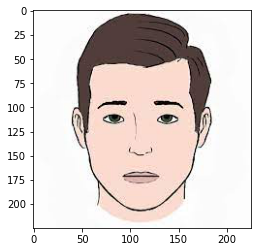

1/1 [==============================] - 0s 115ms/step
drawn_face.jpeg is others


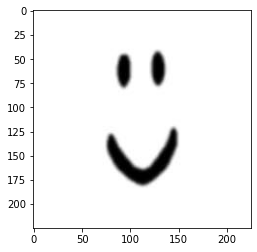

1/1 [==============================] - 0s 297ms/step
emoji1.jpeg is others


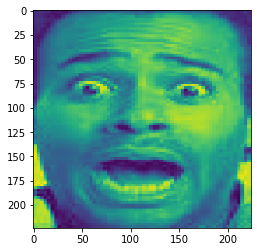

1/1 [==============================] - 0s 92ms/step
fe_20.png is human_face with fear

      anger   disgust      fear  happiness  neutrality   sadness  surprise
0  0.012788  0.000024  0.785508   0.045884    0.001696  0.029082  0.125017
xxxx-----------xxxx------------xxxx-----------xxxx---------



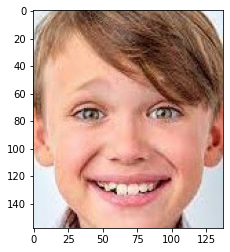

1/1 [==============================] - 0s 155ms/step
happy.jpeg is human_face with happiness

      anger       disgust      fear  happiness  neutrality   sadness  surprise
0  0.000137  6.141597e-07  0.000634   0.998689    0.000121  0.000246  0.000174
xxxx-----------xxxx------------xxxx-----------xxxx---------



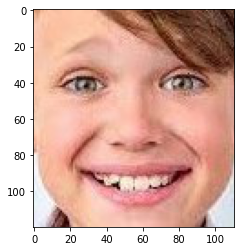

1/1 [==============================] - 0s 210ms/step
happy1.jpeg is human_face with happiness

      anger   disgust      fear  happiness  neutrality   sadness  surprise
0  0.000278  0.000004  0.000239   0.998081    0.000632  0.000071  0.000694
xxxx-----------xxxx------------xxxx-----------xxxx---------



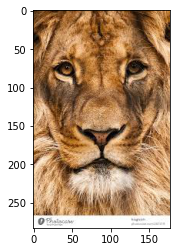

1/1 [==============================] - 0s 126ms/step
lion.jpeg is others


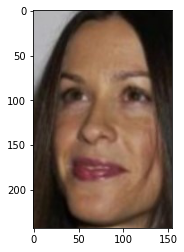

1/1 [==============================] - 0s 82ms/step
neutral.jpg is human_face with neutrality

      anger   disgust      fear  happiness  neutrality   sadness  surprise
0  0.031153  0.000536  0.023326   0.285828    0.572767  0.083746  0.002644
xxxx-----------xxxx------------xxxx-----------xxxx---------



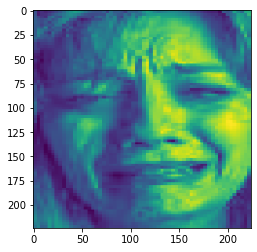

1/1 [==============================] - 0s 281ms/step
sa_54.png is human_face with sadness

      anger  disgust      fear  happiness  neutrality   sadness  surprise
0  0.021163  0.00321  0.058976   0.028558    0.033844  0.851234  0.003015
xxxx-----------xxxx------------xxxx-----------xxxx---------



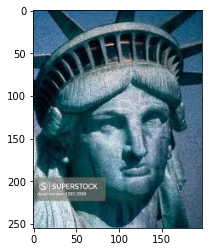

1/1 [==============================] - 0s 130ms/step
statue_of_liberty.jpeg is others


In [9]:
for count, filename in enumerate(os.listdir(folder)):
    # load the image
    im = Image.open(f"{folder}/{filename}")
    plt.imshow(im)
    plt.show()
    # Resize
    img = im.resize((size, size))
    # Grayscale
    imgGray = img.convert('L')
    # Convert the image to a numpy array 
    image = img_to_array(imgGray)
    # Scale the image pixels by 255 (or use a scaler from sklearn here)
    image /= 255
    # building the input vector from the 28x28 pixels
    f_data = image.reshape(1,size, size,1) #conv2D
    # f_data = image.reshape(1,size, size) #conv1D
    # f_data = image.reshape(1,size* size) #dense
    # Make a prediction
    face_result = face_model.predict(f_data).round()
    face_index = np.argmax(face_result)
    face = faces[face_index]
    
    if face == 'others':
        print(f"{filename} is {face}")
    else:
        e_data = image.reshape(1,size, size,1)
        emotion_result= emotion_model.predict(e_data) #.round()
        emotion_df = pd.DataFrame(emotion_result, columns=emotions)
        top1_index = np.argmax(emotion_result)
        top1_emotion = emotions[top1_index]
        print(f"{filename} is {face} with {top1_emotion}\n")
        print(emotion_df)
    print("xxxx-----------xxxx------------xxxx-----------xxxx---------\n")